In [ ]:
#import requisite libraries
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import random

In [68]:
# This is a functions that will return a list of the results of any random walk on the intergers with each entry being the result of a random walk
def int_random_walk(prob, n, trials):
    superlist = []
    for trial in range(trials):
        xi = 0
        for instances in range(n):
            ui = np.random.binomial(1, prob)
            if ui == 1:
                xi = xi + 1
            else:
                xi = xi - 1
        superlist.append(xi)
    return superlist

In [69]:
#Test of IntRandomWalk Function
int_random_walk(.5, 5, 20)

[-1, 1, -3, -1, 1, -1, -1, -3, 1, -1, 1, 1, 1, -1, 1, 1, 3, 5, -1, 3]

In [70]:
#Test 2 of IntRandomWalk Function
int_random_walk(.3, 15, 10)

[-9, -11, -5, -3, -9, -7, 5, -7, -3, -7]

In [71]:
#Test 3 of IntRandomWalk Function
int_random_walk(.9, 10, 15)

[10, 10, 10, 2, 6, 10, 10, 10, 8, 8, 4, 4, 8, 10, 8]

In [72]:
#This function will return a dataset of the variance of simulated Random Walks on The Integers with a corresponding value of p
def variance_simulator(delta, n, trials):
    probi = 0
    df = pd.DataFrame({'p':[],'Variance':[]})
    dfCount = 0
    while probi <= 1:  
        variance = np.var(int_random_walk(probi,n,trials))
        df.loc[dfCount]= [probi, variance]
        probi = probi + delta
        dfCount = dfCount + 1
    df.columns = ['p','Variance']
    return df

In [73]:
variance_simulator(.25, 10, 10)
#This is a test of 

,p,Variance
0,0.00,0.00
1,0.25,8.16
2,0.50,7.56
3,0.75,11.56
4,1.00,0.00


In [74]:
variance_simulator(.25, 10, 50)

,p,Variance
0,0.00,0.0000
1,0.25,5.9456
2,0.50,10.8624
3,0.75,5.6000
4,1.00,0.0000


In [75]:
large_Var_Sim = variance_simulator(.01, 10, 200)

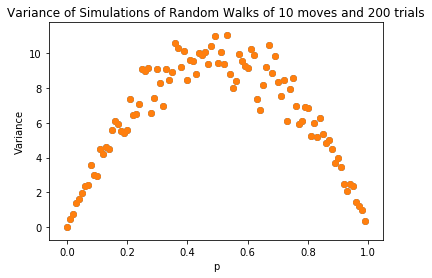

In [76]:
x = large_Var_Sim['p']
y = large_Var_Sim['Variance']
plt.scatter(x, y)
plt.scatter(large_Var_Sim['p'],large_Var_Sim['Variance'])
plt.title(f"Variance of Simulations of Random Walks of 10 moves and 200 trials")
plt.xlabel('p')
plt.ylabel('Variance')
plt.show()

In [77]:
#create a relative frequency graph of a high trial simulation at various values of n and p
def randWalkHist(n,p):
    hist_data = int_random_walk(p, n, 100000)
    bins = 2*n + 1
    plt.hist(hist_data, bins = bins, density=True)
    return plt.show()
    

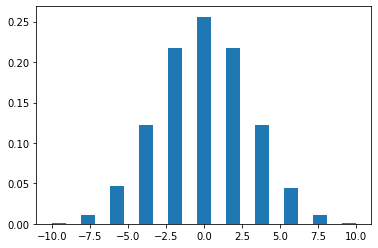

In [78]:
#Histogram test 1 p=.5, n=10: 
randWalkHist(10,.5)

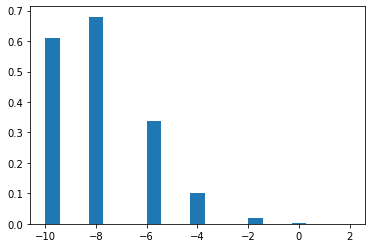

In [79]:
#Histogram test 2 p=.1, n=10: 
randWalkHist(10,.1)

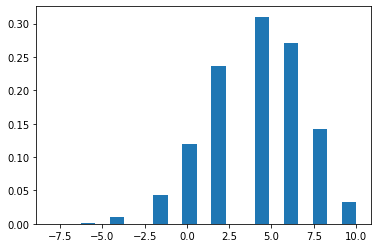

In [80]:
#Histogram test 3 p=.7, n=10: 
randWalkHist(10,.7)

### Now Let Us Move Onto a simulation in Z^n

#### This Function will return a list of a random walks in Z^n with a uniform p (ie probabiliity of going forward)


In [38]:
def dimRandWalk(dim, n, prob, trials): 
    superlist = []
    for instances in range(trials):
        sublist = []
        for instances in range(dim): 
            xi = 0
            for instances in range(n):
                ui = np.random.binomial(1, prob)
                if ui == 1:
                    xi = xi + 1
                else:
                    xi = xi - 1
            sublist.append(xi)
        superlist.append(sublist)
    return superlist
    

In [39]:
#test of this new multidimenstional 
dimRandWalk(5,6,.9,7)

[[4, 4, 6, 6, 4],
 [6, 6, 4, 4, 6],
 [4, 6, 2, 6, 6],
 [6, 4, 6, 6, 4],
 [6, 6, 4, 6, 6],
 [6, 6, 2, 4, 6],
 [6, 6, 6, 2, 6]]

#### Having this is nice, but we would rather be able to simulate the more interesting case in which our probability of going forward is variable across all the dimensions

#### This Function will return a list of a random walks in Z^n with a variable p (ie probabiliity of going forward)


In [54]:
# prob_list is a list of prob values in the interval (0,1) corresponding to each dimension of the random walk)
def varDimRandWalk(dim, n, prob_list, trials): 
    if len(prob_list) != dim:
        errorStr = 'This is an invalid input: the length of your list of probabilities should equal the number of dimensions in the random walk'
        return errorStr
    else:
        superlist = []
        for instances in range(trials):
            sublist = []
            dim_index = 0
            for instances in range(dim): 
                xi = 0
                for instances in range(n):
                    ui = np.random.binomial(1, prob_list[dim_index])
                    if ui == 1:
                        xi = xi + 1
                    else:
                        xi = xi - 1
                sublist.append(xi)
                dim_index = dim_index + 1
            superlist.append(sublist)
        return superlist
            
            
    

In [55]:
varDimRandWalk(3, 6, [.5,.99,.01], 12)

[[0, 6, -6],
 [2, 6, -6],
 [0, 6, -6],
 [2, 6, -6],
 [-6, 6, -6],
 [0, 6, -6],
 [-2, 6, -6],
 [4, 6, -6],
 [-2, 6, -6],
 [-2, 6, -6],
 [0, 6, -6],
 [-2, 6, -6]]

#### Now let us discuss the notion of 'Magnitude' (ie the closest/pythagorean path from where the random walk ended to the origin

In [60]:
#this function will give the Magnitude of each random walk in a set of random walks
def magSetWalks(set_of_walks):
    maglist = []
    for instances in range(len(set_of_walks)):
        magVal = 0
        for i in range(len(set_of_walks[0])):
            magVal = magVal + abs(set_of_walks[instances][i])**2
        magVal = magVal**0.5
        maglist.append(magVal)
    return maglist
        
        

Let us test our new function

In [61]:
#create a set of random walks and input it into our new magnitute function
walkSet = varDimRandWalk(3, 6, [.5,.99,.01], 12)
magSetWalks(walkSet)

[8.717797887081348,
 8.48528137423857,
 8.717797887081348,
 8.717797887081348,
 8.48528137423857,
 8.48528137423857,
 8.48528137423857,
 8.48528137423857,
 8.48528137423857,
 8.48528137423857,
 8.717797887081348,
 8.48528137423857]

In [62]:
# look at our set of walks
walkSet

[[2, 6, -6],
 [0, 6, -6],
 [2, 6, -6],
 [2, 6, -6],
 [0, 6, -6],
 [0, 6, -6],
 [0, 6, -6],
 [0, 6, -6],
 [0, 6, -6],
 [0, 6, -6],
 [2, 6, -6],
 [0, 6, -6]]

In [66]:
#verify that the calculation is correct
print((0**2 + 6**2 + 6**2)**.5)
print((2**2 + 6**2 + 6**2)**.5)

8.48528137423857
8.717797887081348


#### From our work on Random Walks on the Integers we found we can find the variance and expectation via computationally/empirically using a high trial test rather than a deductive method traditionally used in mathematics. Let us utilize this method with respect to our notion of magnitude

In [ ]:
# now let us adapt our variance simukator to simulate a multidimensional random walk
def dim_variance_simulator(dim, delta, n, trials):
    df = pd.DataFrame()
    #CREATE COLUMNS FOR ALL DIMS
    dim_num = 1
    for dims in range(dim):
        df[f'{dim_num}'] = []
        dim_num = dim_num + 1
    df['Variance'] = []
    # find number the set of values of p that will be tested for
    probset = []
    probi = 0
    while probi <= 1:
        probset.append(probi)
        probi = probi + delta
    ### Now Input These In Combination
    max_prob = max(probset)
    p_comb_list = []
    pot_combs = len(probset)**dim
    probset.append(probset)
    probset.append(probset)
    ### Create a base list of combination of values
    while len(p_comb_list)/4 < pot_combs:
        base = []
        for dims in range(dim):
            rand_prob = random.choice(probset)
            base.append(rand_prob)
        list(set(p_comb_list))
    return p_comb_list
    

In [ ]:
dim_variance_simulator(2, .2, 5, 100)
